# Sentiment Analysis and Topic Modelling using Twitter Data: A Reflection on the Nigerian President’s first 100 days in office (2023).

### By Esuola Success Fadil

This project focuses on advanced natural language processing techniques, specifically topic modeling using LDA (Latent Dirichlet Allocation) and NMF (Non-negative Matrix Factorization), and Sentiment Analysis with the VADER (Valence Aware Dictionary and sEntiment Reasoner) Lexicon Library and BERT (Bi-directional Encoder Representation from Transformer) model. These techniques are employed on a large dataset of tweets representing opinions about the Nigerian President’s first 100 days in office to uncover the underlying themes. 



The Steps are outlined below:


## A_Import Relevant Tweets

In [1]:
# Importing the necessary library
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the dataset from the 4 separate excel files
tweet_df_1 = pd.read_excel('Nigeria.xlsx', sheet_name='Tweets')
tweet_df_2 = pd.read_excel('Nigeria-1.xlsx', sheet_name='Tweets')
tweet_df_3 = pd.read_excel('Nigeria-2.xlsx', sheet_name='Tweets')
tweet_df_4 = pd.read_excel('Nigeria-3.xlsx', sheet_name='Tweets')


In [3]:
# Check the shape of each datasets
print("The shape of this dataframe is:",tweet_df_1.shape)
print("The shape of this dataframe is:",tweet_df_2.shape)
print("The shape of this dataframe is:",tweet_df_3.shape)
print("The shape of this dataframe is:",tweet_df_4.shape)

The shape of this dataframe is: (10000, 9)
The shape of this dataframe is: (10000, 9)
The shape of this dataframe is: (5000, 9)
The shape of this dataframe is: (10000, 9)


## B_Merge all the dataframes to one dataframe

In [4]:
# Merged all the dataframes to one dataframe
tweet_df = pd.concat([tweet_df_1, tweet_df_2, tweet_df_3, tweet_df_4])

# Reset index of dataframe
tweet_df = tweet_df.reset_index()

In [5]:
# Check the shape of the merged datasets
print("The shape of the consolidated dataframe dataframe is:",tweet_df.shape)

The shape of the consolidated dataframe dataframe is: (35000, 10)


In [6]:
tweet_df.head()

,index,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value
0,0,"Ministar,networkg,straight and forward,the blues",@EzeMinstar,2023-09-21 19:04:57,@EmirSirdam Injustice everywhere in Nigeria 🇳🇬...,NaN,https://www.twitter.com/user/status/1704934760...,0,0,0.14
1,1,Dr. 'Bosun Tijani,@bosuntijani,2023-09-21 19:04:23,We met with the AWS team to discuss areas of ...,NaN,https://www.twitter.com/user/status/1704934618...,276,1218,320.80
2,2,Philip Francis,@BigPhil1930,2023-09-21 19:03:50,Tinubunomics has failed woefully. Fuel subsidy...,NaN,https://www.twitter.com/user/status/1704934480...,0,0,1.49
3,3,Chukwukadibia,@EzegeBiafra,2023-09-21 19:03:10,@PeterObi Peace start from letting Biafra go a...,NaN,https://www.twitter.com/user/status/1704934311...,0,0,0.12
4,4,Teknon,@ObiPromise_,2023-09-21 19:02:43,"@OgaNlaMedia @OwanEnoh Quite respectfully, the...",NaN,https://www.twitter.com/user/status/1704934198...,0,0,0.05


## C_Tweets Pre-processing

In [7]:
# Drop duplicate tweet
tweet_df.drop_duplicates(subset='Tweet',inplace=True)

# Reset index of dataframe
tweet_df = tweet_df.reset_index()

In [8]:
# Import regular expressions for cleaning and preprocessing steps
import re    

In [9]:
# Clean data ...

# It will remove the old style retweet text "RT"
tweet_df['Tweet'] = tweet_df['Tweet'].apply(str).map(lambda x: re.sub(r'^RT[\s]+','', x))

# It will remove hyperlinks
tweet_df['Tweet'] = tweet_df['Tweet'].apply(str).map(lambda x: re.sub(r'((www.[^s]+)|(https?:\/\/.*[\r\n]*))', '', x))

# Convert the tweets to lowercase
tweet_df['Tweet'] = tweet_df['Tweet'].apply(str).map(lambda x: x.lower())

# Remove punctuations
tweet_df['Tweet'] = tweet_df['Tweet'].apply(str).map(lambda x: re.sub('[,\.!?]','', x))

# Remove repeated characters
tweet_df['Tweet'] = tweet_df['Tweet'].apply(str).map(lambda x: re.sub(r'(.)\1+', r'\1', x))

# Remove username
tweet_df['Tweet'] = tweet_df['Tweet'].apply(str).map(lambda x: re.sub('@[^\s]+', '', x))

# Remove numeric characters
tweet_df['Tweet'] = tweet_df['Tweet'].apply(str).map(lambda x: re.sub('[0-9]+', '', x))

# Remove special characters
tweet_df['Tweet'] = tweet_df['Tweet'].apply(str).map(lambda x: re.sub('[^a-zA-Z0-9]', ' ', x))

In [10]:
# Import stopwords from NLTK library
from nltk.corpus import stopwords 

In [11]:
# Instantialise the list of stopwords
stop_words = set(stopwords.words('english'))

In [12]:
# Create a special list of Custom stop words to be added to original stop words list
custom_stop_words = set(['president', 'mr', 'know','dey','na', 'even', 'ahmed', 'ned', 'tel', 'vice', 'nigeria','tinubu', 'u', 'al', 'lol','ben', 'lok', 'stil', 'se', 'amp', 'ben', 'would', 'bola', 'wil', 'god', 'bles', 'peter', 'obi', 'mohbad'])

# Combine the two sets
stop_words = stop_words.union(custom_stop_words)

In [13]:
len(stop_words)

207

In [14]:
# Create a function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

# Remove stopwords
tweet_df['Tweet'] = tweet_df['Tweet'].apply(str).map(lambda x: remove_stopwords(x))

In [15]:
# Display tweet_df 
tweet_df

,level_0,index,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value
0,0,0,"Ministar,networkg,straight and forward,the blues",@EzeMinstar,2023-09-21 19:04:57,injustice everywhere escape easy naira disvalued,NaN,https://www.twitter.com/user/status/1704934760...,0,0,0.14
1,1,1,Dr. 'Bosun Tijani,@bosuntijani,2023-09-21 19:04:23,met aws team discus areas colaboration expandi...,NaN,https://www.twitter.com/user/status/1704934618...,276,1218,320.80
2,2,2,Philip Francis,@BigPhil1930,2023-09-21 19:03:50,tinubunomics failed woefuly fuel subsidy back ...,NaN,https://www.twitter.com/user/status/1704934480...,0,0,1.49
3,3,3,Chukwukadibia,@EzegeBiafra,2023-09-21 19:03:10,peace start leting biafra go british knows nev...,NaN,https://www.twitter.com/user/status/1704934311...,0,0,0.12
4,4,4,Teknon,@ObiPromise_,2023-09-21 19:02:43,quite respectfuly notion open colaboration laz...,NaN,https://www.twitter.com/user/status/1704934198...,0,0,0.05
...,...,...,...,...,...,...,...,...,...,...,...
34593,34994,9994,Antigono Gonata,@antigno_gonata,2023-09-21 19:07:34,somebody asked back claims miserably failed so...,NaN,https://www.twitter.com/user/status/1704935420...,0,0,0.01
34594,34995,9995,Stanley Nkwocha,@stanleynkwocha_,2023-09-21 19:07:00,noting surprised considering antecedence group...,NaN,https://www.twitter.com/user/status/1704935274...,0,2,3.17
34595,34997,9997,Hassan,@Omale_Sas,2023-09-21 19:06:34,caling people yan wahala never continue wail l...,NaN,https://www.twitter.com/user/status/1704935165...,0,0,0.39
34596,34998,9998,emmakelvin71,@emmakelvin71,2023-09-21 19:05:44,yes citizens today every crime legalized go co...,NaN,https://www.twitter.com/user/status/1704934955...,0,0,0.00


In [16]:
# Create a column to host the lenght of the cleaned text, 
# to check if by cleaning the text removed was too much or almost entirely the tweet!

# Get the text length for each tweet

# Create empty list to hold the lenght of each tweet
text_len = []

# Get the length of each tweet and append to list
for text in tweet_df['Tweet']:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [17]:
# Assign the length of each string to the tweet_df dataframe
tweet_df['Tweet_Length'] = text_len

In [18]:
# There are lots of cleaned tweets with few  words: this is due to the cleaning performed before. 
# This means that some tweets contained only mentions, hashtags and links, which will be removed. 
# We will drop these empty tweets and also those with less than 5 words.
tweet_df = tweet_df[tweet_df['Tweet_Length'] > 5]

In [19]:
# Split dataset into 2 batches. The bigger batch will be used for topic modelling, and sentiment analysis (BERT)
# The smaller batch will be used for fine tuning of BERT Model. 

In [20]:
# Create a new column which will act as the place holder for the y column. This wil help with the split.
tweet_df['y_place'] = ''

In [21]:
# Create the y variable to help with the train test split function
y = tweet_df['y_place']

In [22]:
# Import the necessary library for this splitting task
from sklearn.model_selection import train_test_split

# Split the data into two batches  and testing sets
new_tweet_df, train_tweet_df, new_tweet_y, train_tweet_y = train_test_split(tweet_df, y, test_size=0.15, random_state=42)

In [23]:
# View new datasets
len(new_tweet_df)

25724

## D_Create wordcloud to view emerging themes

In [24]:
# Import the necessary library
from wordcloud import WordCloud
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt

In [25]:
# Combine all the tweets into one single document
tweet_document = ' '.join(list(new_tweet_df['Tweet'].values))

In [26]:
# Display document. To be further used for Word Cloud
tweet_document

'pray bring relief terms petroleum products pricing value naira africa meting featured presentation humanitarian afairs poverty aleviation ministry action plan un general secretary dr beta edu equaly meting united nations population fund unfpa asistant grown pas level since walahi actualy mind one fel political cup tea believe sincerely deserved lead amazingly wel far famous pro rusia wonder low education quality met one london conference anchors isabela adediji isabela graduate education english drama university cambridge began carer corporate comunications nestl plc responsible agriculture advancement expresion interest eoi historic journey strengthen ties betwen cuba field agriculture sa research analytic vp ofice stand behalf past months breakthrough action worked several government us malaria initiative partners implement seasonal malaria chemoprevention smc campaigns benue state republic ghana ministry interior ghana ghana refuge board please give ful asylum life danger forced re

In [27]:
# Create a new commonly used list of stopwords perculiar to Nigerians that do not provide any extra value
# if they occur in the WordCloud
stop_list=['president', 'know', 'even', 'ahmed', 'ned', 'tel', 'vice', 'nigeria','tinubu', 'u', 'al', 'lol','ben', 'lok', 'stil', 'se', 'amp', 'god', 'ben', 'would', 'bola', 'mohbad', 'wil' ]

(-0.5, 999.5, 683.5, -0.5)

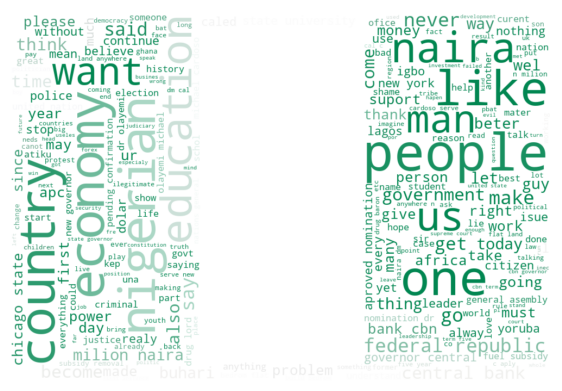

In [28]:
# Generate a word cloud image
mask = np.array(Image.open("nigeriaflag.jpg"))
wordcloud_nig = WordCloud(stopwords=stop_list, background_color="white", mode="RGBA", max_words=250, mask=mask).generate(tweet_document)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_nig.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

#plt.show()

## E_Perform Topic Modelling - LDA

In [29]:
# Import the necessary libraries
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation

In [30]:
# Tokenize tweets


# Assuming 'Tweet' column contains lists of words
#new_tweet_df['Tweet'] = new_tweet_df['Tweet'].apply(lambda x: ' '.join(x)) #this one added on MAC


new_tweet_df['Tweet'] = new_tweet_df['Tweet'].apply(word_tokenize)

In [31]:
# Create lemmatization function
def lemmatizer_(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

In [32]:
# Lemmatize tweets
new_tweet_df['Tweet'] = new_tweet_df['Tweet'].apply(lemmatizer_)

In [33]:
# Assuming new_tweet_df['Tweet'] contains tokenized lists
new_tweet_df['Tweet'] = new_tweet_df['Tweet'].apply(lambda tokens: ' '.join(tokens))

In [34]:
# Display sample tweets
new_tweet_df['Tweet']

7844     pray bring relief term petroleum product prici...
32855    africa meting featured presentation humanitari...
25309    grown pa level since walahi actualy mind one f...
2826         famous pro rusia wonder low education quality
17436    met one london conference anchor isabela adedi...
                               ...                        
34081    agbado hidingnigerians continue living me cal ...
6118             adreses united nation general debate th s
993      played host delegation consisting global leade...
18058    make history first country transgender wike sa...
27118         year left worse met plus dad buhari una ment
Name: Tweet, Length: 25724, dtype: object

In [35]:
# Turn the text tweets into vectors and then build a model.

# To turn the text into a matrix*, where each row in the matrix encodes 
# which words appeared in each individual tweet.

# the vectorizer object will be used to transform text to vector form
dtm = CountVectorizer(max_df=0.11, min_df=0.008, stop_words='english')

# apply transformation
tf = dtm.fit_transform(new_tweet_df['Tweet'])

In [36]:
# View the object
tf

<25724x300 sparse matrix of type '<class 'numpy.int64'>'
	with 132808 stored elements in Compressed Sparse Row format>

In [37]:
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = dtm.get_feature_names_out()

In [38]:
# View the word that each column in the matric represents
tf_feature_names

array(['abuja', 'acros', 'administration', 'adres', 'africa', 'african',
       'alow', 'america', 'apc', 'aply', 'aproved', 'asembly', 'ask',
       'atiku', 'autopsy', 'bad', 'bank', 'bat', 'bedrom', 'bel',
       'believe', 'best', 'beter', 'betwen', 'biden', 'big', 'bilion',
       'boy', 'breaking', 'bring', 'buhari', 'build', 'busines', 'buy',
       'cal', 'caled', 'came', 'canot', 'cardoso', 'care', 'case',
       'cause', 'cbn', 'central', 'certificate', 'chairman', 'change',
       'chicago', 'chief', 'child', 'citizen', 'come', 'coming',
       'company', 'confirmation', 'congratulation', 'continue', 'corupt',
       'coruption', 'cost', 'country', 'court', 'crime', 'criminal',
       'csu', 'curency', 'curent', 'curently', 'david', 'day', 'dear',
       'democracy', 'deputy', 'development', 'dm', 'dolar', 'dolars',
       'dr', 'drug', 'economic', 'education', 'election', 'end', 'energy',
       'exchange', 'face', 'fact', 'failed', 'fake', 'family', 'far',
       'federal'

In [39]:
# Create a variable to hold the number of topics
number_of_topics = 4

# Create LDA object
LDA = LatentDirichletAllocation(n_components = number_of_topics, random_state = 42)

# Fit term frequency matrix to the model
LDA.fit(tf)

LatentDirichletAllocation(n_components=4, random_state=42)

In [40]:
# Function to display Topic
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    # print(topic_dict)    
    return pd.DataFrame(topic_dict)

In [41]:
# Create variables to hold number of words in each topic
no_top_words = 7

# Display the topics
display_topics(LDA, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights
0,subsidy,1492.7,state,2318.8,federal,1319.0,education,2674.1
1,man,1487.3,drug,1124.2,bank,1166.2,people,1985.0
2,like,1413.8,nation,928.9,republic,1102.1,make,1353.8
3,africa,1209.8,university,894.2,new,1089.7,country,1280.4
4,nigerian,1132.0,certificate,825.7,governor,1078.8,milion,1013.2
5,fuel,977.2,chicago,732.2,year,835.6,nigerian,775.3
6,country,911.7,unga,662.3,minister,829.2,schol,719.8


In [42]:
# Transform each tweet using the LDA model to get the topc probabilities
LDA_result = LDA.transform(tf)
new_tweet_df["topic_LDA"] = LDA_result.argmax(axis=1)

In [43]:
#Inspect the new changes in dataset to see the categorization of each tweet according to their LDA topic
new_tweet_df.head()

,level_0,index,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value,Tweet_Length,y_place,topic_LDA
7844,7926,7926,Al-Mahroof Muhammad,@malmahroof37,2023-09-19 10:54:38,pray bring relief term petroleum product prici...,NaN,https://www.twitter.com/user/status/1704086592...,0,3,0.36,9,,2
32855,33213,8213,Ekiti Princess,@Ekiti_Princess1,2023-09-22 08:50:06,africa meting featured presentation humanitari...,NaN,https://www.twitter.com/user/status/1705142416...,0,0,1.26,25,,1
25309,25564,564,Batified Deputy Father.👳,@Iam_shuayb,2023-09-25 18:12:29,grown pa level since walahi actualy mind one f...,NaN,https://www.twitter.com/user/status/1706371108...,0,1,0.73,19,,0
2826,2864,2864,noproblem,@goldssss_p,2023-09-20 23:04:26,famous pro rusia wonder low education quality,NaN,https://www.twitter.com/user/status/1704632639...,0,5,0.17,7,,3
17436,17605,7605,WIMBIZ,@Wimbiz,2023-09-15 13:22:19,met one london conference anchor isabela adedi...,NaN,https://www.twitter.com/user/status/1702674204...,0,0,68.73,21,,1


## F_Perform Topic Modelling - NMF

In [44]:
# Turn the text tweets into vectors using the Tfidf vectorizer

# the vectorizer object will be used to transform text to vector form
dtmi = TfidfVectorizer(max_df=0.11, min_df=0.008, stop_words='english')

# apply transformation
tfi = dtmi.fit_transform(new_tweet_df['Tweet'])

In [45]:
# View the object
tfi

<25724x300 sparse matrix of type '<class 'numpy.float64'>'
	with 132808 stored elements in Compressed Sparse Row format>

In [46]:
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names_i = dtmi.get_feature_names_out()

In [47]:
# View the word that each column in the matric represents
tf_feature_names_i

array(['abuja', 'acros', 'administration', 'adres', 'africa', 'african',
       'alow', 'america', 'apc', 'aply', 'aproved', 'asembly', 'ask',
       'atiku', 'autopsy', 'bad', 'bank', 'bat', 'bedrom', 'bel',
       'believe', 'best', 'beter', 'betwen', 'biden', 'big', 'bilion',
       'boy', 'breaking', 'bring', 'buhari', 'build', 'busines', 'buy',
       'cal', 'caled', 'came', 'canot', 'cardoso', 'care', 'case',
       'cause', 'cbn', 'central', 'certificate', 'chairman', 'change',
       'chicago', 'chief', 'child', 'citizen', 'come', 'coming',
       'company', 'confirmation', 'congratulation', 'continue', 'corupt',
       'coruption', 'cost', 'country', 'court', 'crime', 'criminal',
       'csu', 'curency', 'curent', 'curently', 'david', 'day', 'dear',
       'democracy', 'deputy', 'development', 'dm', 'dolar', 'dolars',
       'dr', 'drug', 'economic', 'education', 'election', 'end', 'energy',
       'exchange', 'face', 'fact', 'failed', 'fake', 'family', 'far',
       'federal'

In [48]:
# Create a variable to hold the number of topics
number_of_topics = 4

# Create NMF object
nmf = NMF(n_components = number_of_topics, random_state= 42)

# Fit term frequency matrix to the model
nmf.fit(tfi)

NMF(n_components=4, random_state=42)

In [49]:
# Function to display Topic - already created earlier
# def display_topics(model, feature_names, no_top_words):
#     topic_dict = {}
#     for topic_idx, topic in enumerate(model.components_):
#         topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
#                         for i in topic.argsort()[:-no_top_words - 1:-1]]
#         topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
#                         for i in topic.argsort()[:-no_top_words - 1:-1]]
#     # print(topic_dict)    
#     return pd.DataFrame(topic_dict)

In [50]:
# Create variables to hold number of words in each topic
no_top_words = 7

# Display the topics
display_topics(nmf, tf_feature_names_i, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights
0,people,2.8,governor,1.8,education,3.8,state,2.1
1,country,2.3,bank,1.5,schol,0.6,federal,1.7
2,like,1.9,new,1.4,child,0.4,republic,1.6
3,nigerian,1.8,cbn,1.3,fre,0.3,university,1.1
4,fuel,1.5,central,1.3,student,0.3,chicago,0.9
5,man,1.2,cardoso,0.9,quality,0.3,certificate,0.5
6,subsidy,1.1,dr,0.8,university,0.2,united,0.4


In [51]:
# Transform each tweet using the NMF model to get the topic probabilities
NMF_result = nmf.transform(tfi)
new_tweet_df["topic_NMF"] = NMF_result.argmax(axis=1)

In [52]:
#Inspect new changes in dataset again
new_tweet_df.head()

,level_0,index,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value,Tweet_Length,y_place,topic_LDA,topic_NMF
7844,7926,7926,Al-Mahroof Muhammad,@malmahroof37,2023-09-19 10:54:38,pray bring relief term petroleum product prici...,NaN,https://www.twitter.com/user/status/1704086592...,0,3,0.36,9,,2,1
32855,33213,8213,Ekiti Princess,@Ekiti_Princess1,2023-09-22 08:50:06,africa meting featured presentation humanitari...,NaN,https://www.twitter.com/user/status/1705142416...,0,0,1.26,25,,1,3
25309,25564,564,Batified Deputy Father.👳,@Iam_shuayb,2023-09-25 18:12:29,grown pa level since walahi actualy mind one f...,NaN,https://www.twitter.com/user/status/1706371108...,0,1,0.73,19,,0,0
2826,2864,2864,noproblem,@goldssss_p,2023-09-20 23:04:26,famous pro rusia wonder low education quality,NaN,https://www.twitter.com/user/status/1704632639...,0,5,0.17,7,,3,2
17436,17605,7605,WIMBIZ,@Wimbiz,2023-09-15 13:22:19,met one london conference anchor isabela adedi...,NaN,https://www.twitter.com/user/status/1702674204...,0,0,68.73,21,,1,2


## G_BERT MODELLING: STEP 1 & 2 - LABEL DATA FOR FINETUNING BERT USING VADER

In [53]:
# Importing the necessary libraries

# Importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sheriffsanusi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
# Creating sentiment analysis object
sid = SentimentIntensityAnalyzer()

In [56]:
# Calculate the polarity scores of each tweet using the VADER sentiment analyzer
train_tweet_df['scores'] = train_tweet_df['Tweet'].apply(lambda text: sid.polarity_scores(text))

In [57]:
# Inspect dataset again
train_tweet_df.head(5)

,level_0,index,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value,Tweet_Length,y_place,scores
12460,12571,2571,EdwardIyare,@EdwardIyareN,2023-09-17 07:17:58,obj former military head state civilian tradit...,NaN,https://www.twitter.com/user/status/1703307288...,0,1,0.06,16,,"{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'comp..."
5125,5185,5185,Spiceman,@danilo1971,2023-09-20 09:24:36,size ghana economy make bigest debtor imf egyp...,NaN,https://www.twitter.com/user/status/1704426321...,0,0,0.02,16,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
21473,21704,1704,YAYO🦇,@TradesbiYayo,2023-09-13 20:42:15,bigest forex influencers promoting ds son visit,NaN,https://www.twitter.com/user/status/1702060144...,0,0,0.04,7,,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp..."
1818,1846,1846,Big Asiwaju Of EgbaLand,@OWealthcome,2023-09-21 09:00:11,protest tok place february year sagamu naira r...,NaN,https://www.twitter.com/user/status/1704782566...,1,0,4.60,19,,"{'neg': 0.331, 'neu': 0.669, 'pos': 0.0, 'comp..."
15135,15269,5269,Idongesit,@Ubonid,2023-09-16 07:15:09,surprise prof wole soyinka shameles eminent me...,NaN,https://www.twitter.com/user/status/1702944194...,0,0,3.39,21,,"{'neg': 0.252, 'neu': 0.44, 'pos': 0.308, 'com..."


In [58]:
# Function to get the sentiment from the compound score
def sentimentPredict(sentiment):
    if sentiment['compound'] > 0:
        return "Positive"
    else:
        return "Negative"

In [59]:
# Function to get the sentiment from the compound score for 3 way sentiment classification (positive, negative and neutral)
# def sentimentPredict(sentiment):
#     if sentiment['compound'] >= 0.05:
#         return "Positive"
#     elif sentiment['compound'] <= -0.05: 
#         return "Negative"
#     else:
#         return "Neutral"

In [60]:
# Get the sentiment of each tweet
train_tweet_df['label'] = train_tweet_df['scores'].apply(lambda text: sentimentPredict(text))

In [61]:
# Inspect dataset again
train_tweet_df.head(5)

,level_0,index,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value,Tweet_Length,y_place,scores,label
12460,12571,2571,EdwardIyare,@EdwardIyareN,2023-09-17 07:17:58,obj former military head state civilian tradit...,NaN,https://www.twitter.com/user/status/1703307288...,0,1,0.06,16,,"{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'comp...",Positive
5125,5185,5185,Spiceman,@danilo1971,2023-09-20 09:24:36,size ghana economy make bigest debtor imf egyp...,NaN,https://www.twitter.com/user/status/1704426321...,0,0,0.02,16,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Negative
21473,21704,1704,YAYO🦇,@TradesbiYayo,2023-09-13 20:42:15,bigest forex influencers promoting ds son visit,NaN,https://www.twitter.com/user/status/1702060144...,0,0,0.04,7,,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",Positive
1818,1846,1846,Big Asiwaju Of EgbaLand,@OWealthcome,2023-09-21 09:00:11,protest tok place february year sagamu naira r...,NaN,https://www.twitter.com/user/status/1704782566...,1,0,4.60,19,,"{'neg': 0.331, 'neu': 0.669, 'pos': 0.0, 'comp...",Negative
15135,15269,5269,Idongesit,@Ubonid,2023-09-16 07:15:09,surprise prof wole soyinka shameles eminent me...,NaN,https://www.twitter.com/user/status/1702944194...,0,0,3.39,21,,"{'neg': 0.252, 'neu': 0.44, 'pos': 0.308, 'com...",Positive


In [62]:
# Group tweets to see count of positive and negative tweets
vd_label = train_tweet_df.groupby("label").count().reset_index()

# Select label column and any other column to represent the count
vd_label = vd_label[['label','scores']]

# Rename columns
new_column_names = {
    'label': 'label',
    'scores': 'count'
}

vd_label.rename(columns=new_column_names, inplace=True)

In [63]:
# Count the number of positive and negative tweets in dataframe
vd_label

,label,count
0,Negative,2454
1,Positive,2086


## I_BERT MODELLING: STEP 3 - CREATE TRAINING AND VALIDATION SET WITH BALANCED SET FOR BERT MODEL

In [64]:
# Import the necessary library for SMOTE Balancing
from imblearn.over_sampling import RandomOverSampler 


ros =  RandomOverSampler(sampling_strategy = 'not majority', random_state=42)

X = train_tweet_df['Tweet']
y = train_tweet_df['label']


# Apply RandomOverSampler to balance the class distribution
X_train, y_train = ros.fit_resample(np.array(X).reshape(-1, 1), np.array(y).reshape(-1, 1))

# Create a DataFrame with the resampled data
train_tweet_res_df = pd.DataFrame(list(zip([x[0] for x in X_train], y_train)), columns = ['Tweets', 'Labels']);

# Dataset is balanced

# Inspect balancing
print(train_tweet_res_df['Labels'].value_counts())

Positive    2454
Negative    2454
Name: Labels, dtype: int64


In [65]:
#Test 1 - delete when done 
train_tweet_res_df 

,Tweets,Labels
0,obj former military head state civilian tradit...,Positive
1,size ghana economy make bigest debtor imf egyp...,Negative
2,bigest forex influencers promoting ds son visit,Positive
3,protest tok place february year sagamu naira r...,Negative
4,surprise prof wole soyinka shameles eminent me...,Positive
...,...,...
4903,arives new york unga arived new york th editio...,Positive
4904,recent award mvno licences opens unique oportu...,Positive
4905,kep atracting foreign investors around globe p...,Positive
4906,oluremi celebrating wife guardian news world news,Positive


In [66]:
# Encode the label column to be numerical instead of textual

# Import label encoder for encoding task
from sklearn import preprocessing 
  
# Instantiate Label Encoder Class
# Label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Test 2 - Delete when done, uncomment line above
train_tweet_res_df['label_encoded']= label_encoder.fit_transform(train_tweet_res_df['Labels']) 

In [67]:
# Inspect Dataframe again
train_tweet_res_df

,Tweets,Labels,label_encoded
0,obj former military head state civilian tradit...,Positive,1
1,size ghana economy make bigest debtor imf egyp...,Negative,0
2,bigest forex influencers promoting ds son visit,Positive,1
3,protest tok place february year sagamu naira r...,Negative,0
4,surprise prof wole soyinka shameles eminent me...,Positive,1
...,...,...,...
4903,arives new york unga arived new york th editio...,Positive,1
4904,recent award mvno licences opens unique oportu...,Positive,1
4905,kep atracting foreign investors around globe p...,Positive,1
4906,oluremi celebrating wife guardian news world news,Positive,1


In [68]:
# A validation set will be extracted from the training set to monitor the model accuracy and  prevent overfitting.

# Declare X and y variables for this purpose - to use with train_test_split
X = train_tweet_res_df['Tweets']
y = train_tweet_res_df['label_encoded']


# Use the traintest split to obtain training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

## J_BERT MODELLING: STEP 4 - BUILD MODEL

In [69]:
# Import necessary libraries
import tensorflow as tf
from transformers import BertTokenizerFast
from transformers import TFBertModel
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
# Now we can import the BERT model from the pretrained library from Hugging face.
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [72]:
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [73]:
# # Using one hot encoding on the target variable  achieved higher accuracy after some experimentation
# # So change label variable to one hot encoding.
# # EDIT: We will save a copy of the label encoded target columns since they could be useful for further analysis.

# y_train_le = y_train.copy()
# y_valid_le = y_valid.copy()
# y_test_le = y_test.copy()

# # Perform onehot encoding
# ohe = preprocessing.OneHotEncoder()
# y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
# y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
# y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [74]:
# Build the BERT Model

In [75]:
# A basic analysis has already been performed to ascertain MAX_LEN of 128 (checking the maximum length of tokenized sentences) tokenized sentences, 
# Define a custom tokenizer function 
# Call the encode_plus method of the BERT tokenizer.

MAX_LEN = 100

# Set the random seed for reproducibility
np.random.seed(42)

def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [76]:
# Apply the tokenizer function to the train, validation sets.

train_input_ids, train_attention_masks = tokenize(X_train.values, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid.values, MAX_LEN)

In [77]:
# Then, we create a custom function to host the pre trained BERT model, 
# and attach to it a 1 neurons output layer, necessary to perform the binary classification 
# of the 2 different output classes of the dataset (the 2 emotions - positive, negative).

# Create model architecture
def create_model(bert_model, max_len=MAX_LEN):
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    loss = tf.keras.losses.BinaryCrossentropy()
    accuracy = tf.keras.metrics.BinaryAccuracy()
    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    embeddings = bert_model([input_ids,attention_masks])[1]
    dropout = Dropout(0.6)(embeddings) 
    #output = tf.keras.layers.Dense(1, activation="sigmoid", kernel_regularizer=l2(0.01))(dropout)
    output = tf.keras.layers.Dense(1, activation="sigmoid")(dropout)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    model.compile(opt, loss=loss, metrics=accuracy)
    return model

In [78]:
print(type(bert_model))

<class 'transformers.models.bert.modeling_tf_bert.TFBertModel'>


In [79]:
# Inspect Model Architecture
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_2[0][0]']             
                             hidden_state=(None, 100, 7                                           
                             68),                                                             

In [80]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train.values, validation_data=([val_input_ids,val_attention_masks], y_valid.values), epochs=2, batch_size=64)

Epoch 1/2
54/54 [==============================] - 673s 12s/step - loss: 0.6884 - binary_accuracy: 0.5799 - val_loss: 0.6192 - val_binary_accuracy: 0.7115
Epoch 2/2
54/54 [==============================] - 663s 12s/step - loss: 0.4128 - binary_accuracy: 0.8233 - val_loss: 0.3951 - val_binary_accuracy: 0.8473


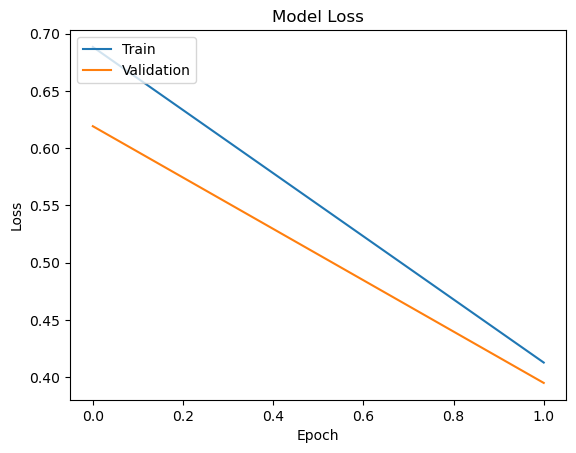

In [81]:
# Plot Training and Validation Loss
plt.plot(history_bert.history['loss'])
plt.plot(history_bert.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.xlim(0, 1) 
# plt.ylim(0, 1)
plt.show()

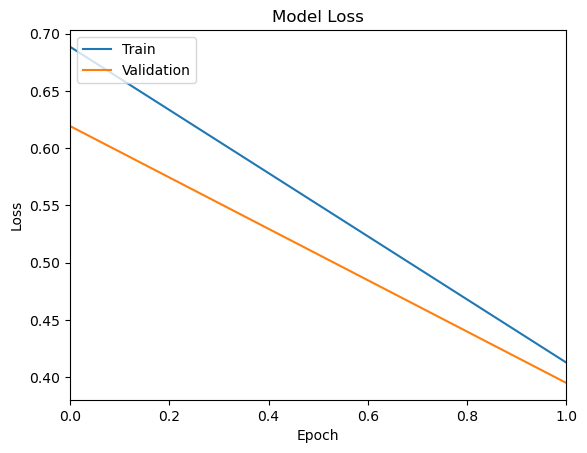

In [82]:
# Plot Training and Validation Loss
plt.plot(history_bert.history['loss'])
plt.plot(history_bert.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.xlim(0, 1) 
# plt.ylim(0, 1)
plt.show()

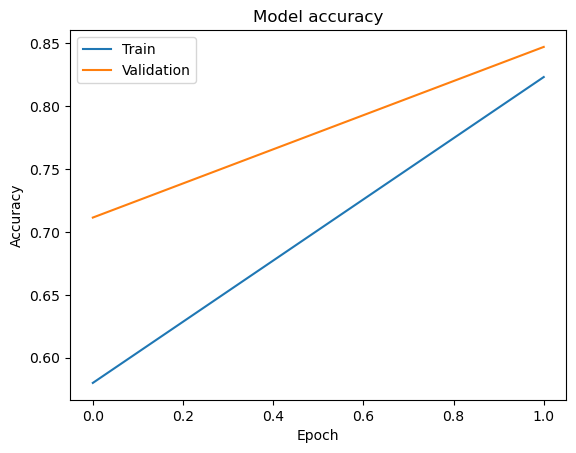

In [83]:
# Plot Training and Validation Accuracy
plt.plot(history_bert.history['binary_accuracy'])
plt.plot(history_bert.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.xlim(0, 1) 

plt.show()

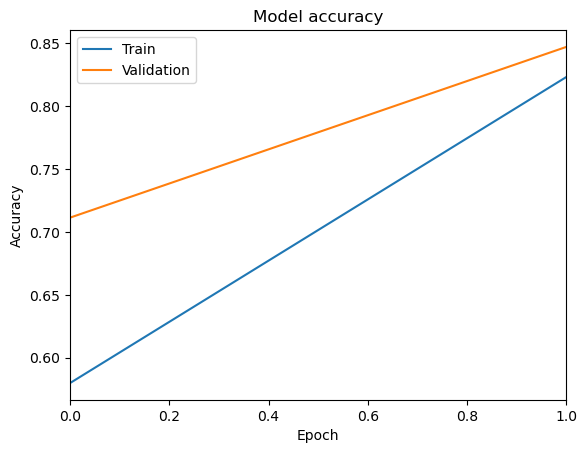

In [84]:
# Plot Training and Validation Accuracy
plt.plot(history_bert.history['binary_accuracy'])
plt.plot(history_bert.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.xlim(0, 1) 

plt.show()

## K_BERT MODELLING: STEP 5 - UNCOVER SENTIMENT

In [85]:
# Apply the tokenizer function to the prediction set.

# First extract the tweets from 'new_tweet_df'
pred_tweet = new_tweet_df['Tweet']

# Apply tokenizer function
pred_dataset_input_ids, pred_dataset_attention_masks = tokenize(pred_tweet.values, MAX_LEN)

In [86]:
# Make prediction
pred_result = model.predict([pred_dataset_input_ids,pred_dataset_attention_masks])

804/804 [==============================] - 1279s 2s/step


In [87]:
# View pred_result
pred_result

# As expected due to sigmoid aaactivation function which predicts the propobility of likelyhood with the positive class

array([[0.8191851 ],
       [0.95242965],
       [0.99893343],
       ...,
       [0.999339  ],
       [0.05498984],
       [0.00226224]], dtype=float32)

In [88]:
# Make using 0.5 as a benchmark deduce the positive and negative class from pred_result
actual_pred_result = (pred_result >= 0.5).astype(int)

In [89]:
# Display new_tweet_df with original tweet and topic classification
new_tweet_df.head()

,level_0,index,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value,Tweet_Length,y_place,topic_LDA,topic_NMF
7844,7926,7926,Al-Mahroof Muhammad,@malmahroof37,2023-09-19 10:54:38,pray bring relief term petroleum product prici...,NaN,https://www.twitter.com/user/status/1704086592...,0,3,0.36,9,,2,1
32855,33213,8213,Ekiti Princess,@Ekiti_Princess1,2023-09-22 08:50:06,africa meting featured presentation humanitari...,NaN,https://www.twitter.com/user/status/1705142416...,0,0,1.26,25,,1,3
25309,25564,564,Batified Deputy Father.👳,@Iam_shuayb,2023-09-25 18:12:29,grown pa level since walahi actualy mind one f...,NaN,https://www.twitter.com/user/status/1706371108...,0,1,0.73,19,,0,0
2826,2864,2864,noproblem,@goldssss_p,2023-09-20 23:04:26,famous pro rusia wonder low education quality,NaN,https://www.twitter.com/user/status/1704632639...,0,5,0.17,7,,3,2
17436,17605,7605,WIMBIZ,@Wimbiz,2023-09-15 13:22:19,met one london conference anchor isabela adedi...,NaN,https://www.twitter.com/user/status/1702674204...,0,0,68.73,21,,1,2


In [90]:
new_tweet_df['bert_sentiment'] = actual_pred_result

In [91]:
# Preview Added Columns
new_tweet_df

,level_0,index,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value,Tweet_Length,y_place,topic_LDA,topic_NMF,bert_sentiment
7844,7926,7926,Al-Mahroof Muhammad,@malmahroof37,2023-09-19 10:54:38,pray bring relief term petroleum product prici...,NaN,https://www.twitter.com/user/status/1704086592...,0,3,0.36,9,,2,1,1
32855,33213,8213,Ekiti Princess,@Ekiti_Princess1,2023-09-22 08:50:06,africa meting featured presentation humanitari...,NaN,https://www.twitter.com/user/status/1705142416...,0,0,1.26,25,,1,3,1
25309,25564,564,Batified Deputy Father.👳,@Iam_shuayb,2023-09-25 18:12:29,grown pa level since walahi actualy mind one f...,NaN,https://www.twitter.com/user/status/1706371108...,0,1,0.73,19,,0,0,1
2826,2864,2864,noproblem,@goldssss_p,2023-09-20 23:04:26,famous pro rusia wonder low education quality,NaN,https://www.twitter.com/user/status/1704632639...,0,5,0.17,7,,3,2,0
17436,17605,7605,WIMBIZ,@Wimbiz,2023-09-15 13:22:19,met one london conference anchor isabela adedi...,NaN,https://www.twitter.com/user/status/1702674204...,0,0,68.73,21,,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34081,34472,9472,🎖️💙£lawwwn❤️🎖️,@Shizzyforbez,2023-09-21 21:50:19,agbado hidingnigerians continue living me cal ...,NaN,https://www.twitter.com/user/status/1704976373...,0,0,0.07,7,,0,0,0
6118,6192,6192,Chumah,@iconyia,2023-09-20 02:25:48,adreses united nation general debate th s,NaN,https://www.twitter.com/user/status/1704320925...,0,0,0.24,7,,1,3,1
993,1008,1008,Majorwaves Energy Report,@MajorwavesER,2023-09-21 13:00:42,played host delegation consisting global leade...,NaN,https://www.twitter.com/user/status/1704843094...,1,1,3.27,18,,1,1,1
18058,18230,8230,King Esquire,@BeginEsquire,2023-09-15 08:20:54,make history first country transgender wike sa...,NaN,https://www.twitter.com/user/status/1702598351...,0,1,1.27,14,,3,0,0


In [92]:
# Simple Script to change the value of 0 to Negative and 1 to positive 
new_tweet_df['bert_sentiment_label'] = new_tweet_df['bert_sentiment'].apply(lambda x: 'Negative' if x == 0 else 'Positive')

## M_SENTIMENT AND TOPIC MODELLING ANALYSIS

In [93]:
# Importing the necessary library
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [94]:
# Group tweets to see total count of positive and negative tweets according ot BERT
sent_count = new_tweet_df.groupby("bert_sentiment_label").count().reset_index()

# Select label column and any other column to represent the count
sent_count = sent_count[['bert_sentiment_label','Tweet']]

# Rename columns
new_column_names = {
    'bert_sentiment_label': 'label',
    'Tweet': 'count'
}

sent_count.rename(columns=new_column_names, inplace=True)

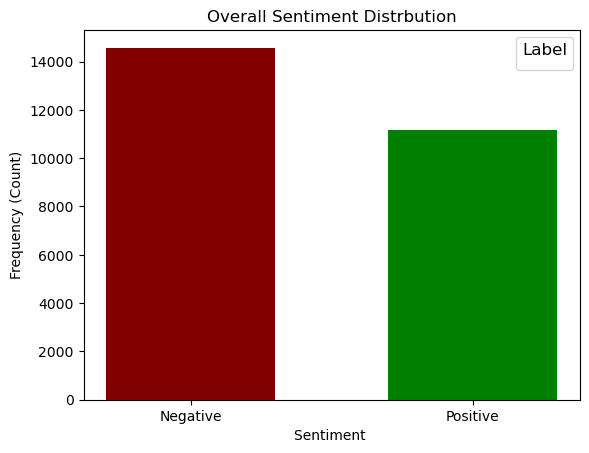

In [95]:
# Visualize overall sentiment distribution 

# Specify colors for each bar
colors = ['maroon', 'green']

# Plot graph
plt.bar(sent_count['label'], sent_count['count'], color =colors, 
        width = 0.6)
plt.title('Overall Sentiment Distrbution')
plt.xlabel('Sentiment ')
plt.ylabel('Frequency (Count)')
plt.legend(title='Label', title_fontsize='12')
plt.show()

In [96]:
# Visualize sentiments distribution according to topic - LDA


# Give the topics within new_tweet_df actual topic references
new_tweet_df['topic_LDA_label'] = new_tweet_df['topic_LDA'].apply(lambda x: 
    'Topic 1' if x == 0 else
    'Topic 2' if x == 1 else
    'Topic 3' if x == 2 else
    'Topic 4' if x == 3 else 'Undefined'
)

# Peform groupby acording to topic and sentiments
tp_LDA_label = new_tweet_df.groupby(["topic_LDA_label","bert_sentiment_label"]).count().reset_index()

# Select the label and topic column and any other column to represent the count
tp_LDA_label = tp_LDA_label[['topic_LDA_label','bert_sentiment_label','Tweet']]

# Rename columns
new_column_names = {
    'topic_LDA_label': 'topic',
    'bert_sentiment_label': 'label',
    'Tweet': 'count'
}

tp_LDA_label.rename(columns=new_column_names, inplace=True)

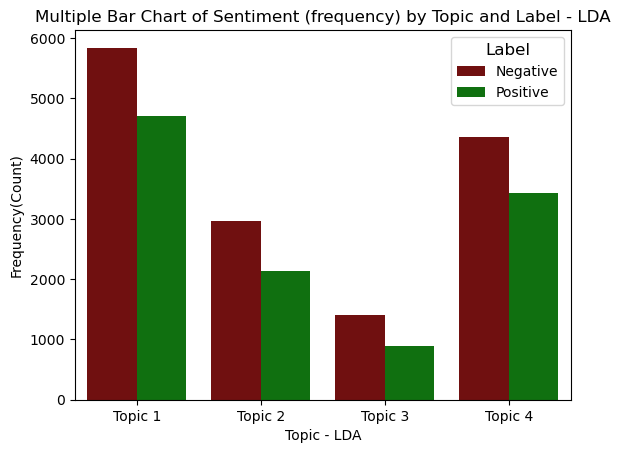

In [97]:
# Visualize graph - LDA

sns.barplot(data=tp_LDA_label, x='topic', y='count', hue='label', palette={'Positive': 'green', 'Negative': 'maroon'})
plt.title('Multiple Bar Chart of Sentiment (frequency) by Topic and Label - LDA')
plt.xlabel('Topic - LDA')
plt.ylabel('Frequency(Count)')
plt.legend(title='Label', title_fontsize='12')
plt.show()

In [98]:
# Visualize sentiments distribution according to topic - NMF


# Give the topics within new_tweet_df actual topic references
new_tweet_df['topic_NMF_label'] = new_tweet_df['topic_NMF'].apply(lambda x: 
    'Topic 1' if x == 0 else
    'Topic 2' if x == 1 else
    'Topic 3' if x == 2 else
    'Topic 4' if x == 3 else 'Undefined'
)

# Peform groupby acording to topic and sentiments
tp_NMF_label = new_tweet_df.groupby(["topic_NMF_label","bert_sentiment_label"]).count().reset_index()

# Select the label and topic column and any other column to represent the count
tp_NMF_label = tp_NMF_label[['topic_NMF_label','bert_sentiment_label','Tweet']]

# Rename columns
new_column_names = {
    'topic_NMF_label': 'topic',
    'bert_sentiment_label': 'label',
    'Tweet': 'count'
}

tp_NMF_label.rename(columns=new_column_names, inplace=True)

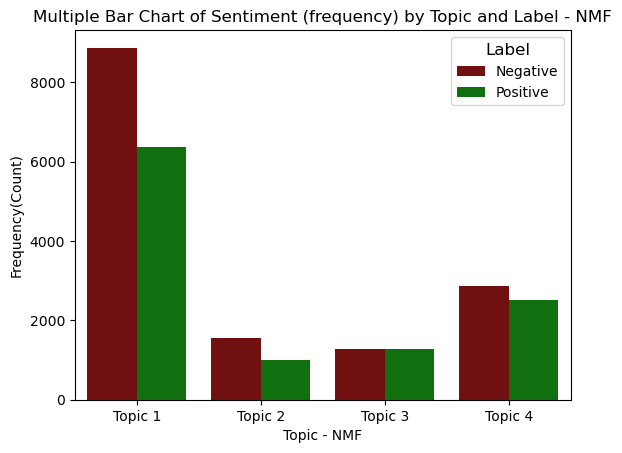

In [99]:
# Visualize graph - NMF

sns.barplot(data=tp_NMF_label, x='topic', y='count', hue='label', palette={'Positive': 'green', 'Negative': 'maroon'})
plt.title('Multiple Bar Chart of Sentiment (frequency) by Topic and Label - NMF')
plt.xlabel('Topic - NMF')
plt.ylabel('Frequency(Count)')
plt.legend(title='Label', title_fontsize='12')
plt.show()

In [100]:
# Visualize topic distribution frequency - LDA


# Group tweets to see topics according to LDA
LDA_count = new_tweet_df.groupby("topic_LDA_label").count().reset_index()

# Select label column and any other column to represent the count
LDA_count = LDA_count[['topic_LDA_label','Tweet']]

# Rename columns
new_column_names = {
    'topic_LDA_label': 'topic',
    'Tweet': 'count'
}

LDA_count.rename(columns=new_column_names, inplace=True)

In [101]:
# Visualize LDA Count dataframe
print("The frequency ditribution of each LDA-Topic")
LDA_count

The frequency ditribution of each LDA-Topic


,topic,count
0,Topic 1,10538
1,Topic 2,5103
2,Topic 3,2298
3,Topic 4,7785


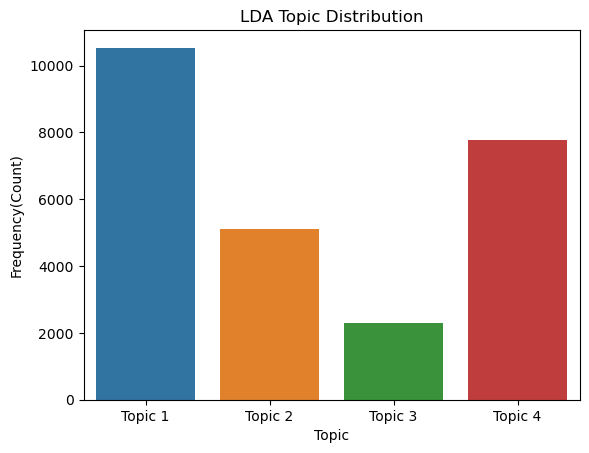

In [102]:
# Visualize bar graph - LDA

sns.barplot(data=LDA_count, x='topic', y='count')
plt.title('LDA Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Frequency(Count)')
plt.show()

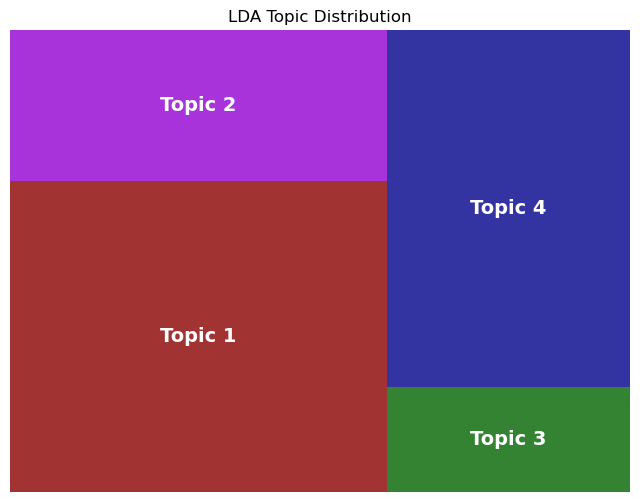

In [103]:
# Visualize box plot - LDA


# Define colors for each topic(box)
color_mapping = {
    'Topic 1': 'darkred',
    'Topic 2': 'darkviolet',
    'Topic 3': 'darkgreen',
    'Topic 4': 'darkblue',
}

# Create a list of colors based on the topic column
colors = [color_mapping.get(topic, 'grey') for topic in LDA_count['topic']]

# Increase text size and set text color
text_kwargs = {'fontsize': 14, 'color': 'white', 'weight': 'bold'}

sizes = LDA_count['count']
labels = LDA_count['topic']

plt.figure(figsize=(8, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors, text_kwargs=text_kwargs)
plt.axis('off')
plt.title('LDA Topic Distribution')
plt.show()

In [104]:
# Visualize topic distribution frequency - NMF


# Group tweets to see topics according to NMF
NMF_count = new_tweet_df.groupby("topic_NMF_label").count().reset_index()

# Select label column and any other column to represent the count
NMF_count = NMF_count[['topic_NMF_label','Tweet']]

# Rename columns
new_column_names = {
    'topic_NMF_label': 'topic',
    'Tweet': 'count'
}

NMF_count.rename(columns=new_column_names, inplace=True)

In [105]:
# Visualize LDA Count dataframe
print("The frequency ditribution of each NMF-Topic")
NMF_count

The frequency ditribution of each NMF-Topic


,topic,count
0,Topic 1,15236
1,Topic 2,2551
2,Topic 3,2546
3,Topic 4,5391


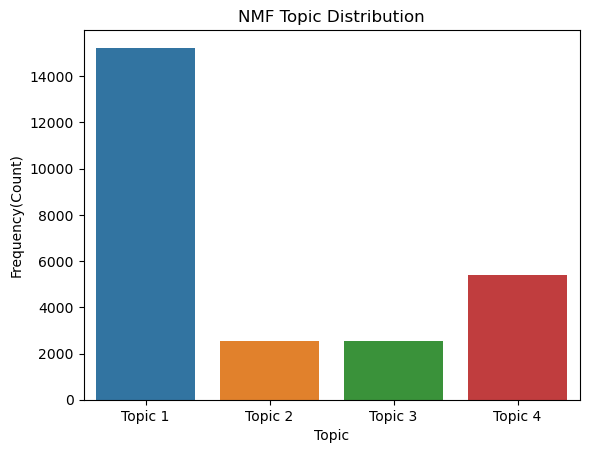

In [106]:
# Visualize bar graph - NMF

sns.barplot(data=NMF_count, x='topic', y='count')
plt.title('NMF Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Frequency(Count)')
plt.show()

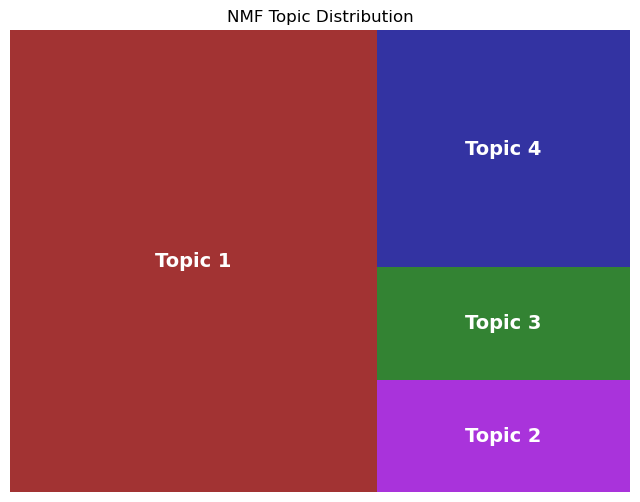

In [107]:
# Visualize box plot - NMF


# Create a list of colors based on the topic column
colors = [color_mapping.get(topic, 'grey') for topic in NMF_count['topic']]

# Increase text size and set text color
text_kwargs = {'fontsize': 14, 'color': 'white', 'weight': 'bold'}

sizes = NMF_count['count']
labels = NMF_count['topic']

plt.figure(figsize=(8, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors, text_kwargs=text_kwargs)
plt.axis('off')
plt.title('NMF Topic Distribution')
plt.show()